# TD1 : Jeux de données, classification, corrélation, clustering

In [65]:
import sklearn
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import re
import warnings; warnings.simplefilter('ignore')

Load data and transpose

In [66]:
cl_file = Path("cost-of-living.csv")
df_cl = pd.read_csv(cl_file, index_col=0)
df_cl.head()

,"Saint Petersburg, Russia","Istanbul, Turkey","Izmir, Turkey","Helsinki, Finland","Chisinau, Moldova","Milan, Italy","Cairo, Egypt","Banja Luka, Bosnia And Herzegovina","Baku, Azerbaijan","Guadalajara, Mexico",...,"Lviv, Ukraine","Novosibirsk, Russia","Bursa, Turkey","Brussels, Belgium","Jerusalem, Israel","Melbourne, Australia","Perth, Australia","Sydney, Australia","Alexandria, Egypt","Quito, Ecuador"
"Meal, Inexpensive Restaurant",7.34,4.58,3.06,12.00,4.67,15.0,3.38,3.58,5.27,5.25,...,3.75,5.72,3.82,15.0,15.56,10.22,12.43,11.81,2.81,3.59
"Meal for 2 People, Mid-range Restaurant, Three-course",29.35,15.28,12.22,65.00,20.74,60.0,17.48,22.99,23.73,23.86,...,18.76,22.01,11.47,60.0,62.24,49.54,56.55,54.37,14.06,31.45
McMeal at McDonalds (or Equivalent Combo Meal),4.40,3.82,3.06,8.00,4.15,8.0,4.51,3.58,4.22,4.25,...,3.56,3.67,3.06,8.2,12.97,7.12,7.32,7.15,3.38,5.39
Domestic Beer (0.5 liter draught),2.20,3.06,2.29,6.50,1.04,5.0,1.69,1.02,0.84,1.43,...,1.50,1.10,2.37,4.0,7.26,5.57,5.90,4.97,1.69,1.35
Imported Beer (0.33 liter bottle),2.20,3.06,2.75,6.75,1.43,5.0,2.82,1.53,2.11,2.39,...,1.50,2.20,3.06,4.0,7.26,5.57,5.59,4.97,2.81,2.70


In [67]:
# Tranpose attr to cols
df_cl = df_cl.T
df_cl.head()

,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
"Saint Petersburg, Russia",7.34,29.35,4.40,2.20,2.20,0.76,0.53,0.98,0.71,1.18,...,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.29,411.83,5388.86
"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,...,0.61,1.84,1.30,0.80,1.91,0.62,9.73,20874.72,282.94,6905.43
"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,...,0.57,1.56,1.31,0.70,1.78,0.58,8.61,20898.83,212.18,4948.41
"Helsinki, Finland",12.00,65.00,8.00,6.50,6.75,2.66,1.89,0.96,2.27,2.02,...,2.30,3.87,2.13,2.91,1.61,1.25,12.34,24402.77,351.60,1641.00
"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,1.11,...,0.84,1.25,0.93,1.56,1.37,0.59,5.37,17238.13,210.52,2679.30


In [68]:
# Overview
df_cl.describe()

,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,...,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,7.967187,35.768625,5.634250,3.257625,3.702937,1.261188,0.935125,0.998937,1.197875,1.902813,...,0.995187,2.391625,1.583187,1.809750,1.355938,1.076563,9.599437,20497.003688,447.470187,8039.567875
std,4.474586,18.878654,2.036808,2.140890,1.949165,0.723930,0.627407,0.391720,0.760670,0.752520,...,0.484362,0.994821,0.964584,1.080635,0.481411,0.648750,4.964241,6037.691697,421.356658,5972.758905
min,1.490000,7.590000,2.670000,0.780000,1.200000,0.290000,0.140000,0.390000,0.100000,0.750000,...,0.200000,0.670000,0.520000,0.350000,0.480000,0.250000,4.150000,11163.690000,37.060000,788.020000
25%,4.647500,20.925000,4.110000,1.665000,2.200000,0.647500,0.385000,0.710000,0.555000,1.377500,...,0.610000,1.537500,0.930000,1.050000,1.057500,0.547500,6.747500,17439.037500,176.375000,3666.565000
50%,6.285000,30.555000,5.095000,2.365000,3.080000,1.140000,0.810000,0.895000,1.020000,1.850000,...,0.910000,2.145000,1.225000,1.495000,1.250000,0.920000,8.690000,18868.595000,281.015000,6460.615000
75%,11.472500,49.637500,7.000000,4.812500,4.845000,1.750000,1.375000,1.170000,1.690000,2.352500,...,1.270000,3.132500,1.905000,2.455000,1.662500,1.420000,11.195000,21409.800000,572.902500,10511.532500
max,23.120000,109.160000,12.970000,11.130000,11.130000,3.870000,3.210000,2.640000,3.330000,5.330000,...,2.580000,5.210000,5.700000,5.760000,3.500000,3.400000,46.090000,67345.100000,2194.640000,34441.930000


In [69]:
# get attr and data points names
attr = df_cl.columns.to_list()
obs = df_cl.index.to_list()
print(f"First 10 attributes :\n{attr[0:10]}\n")
print(f"First 10 data points :\n{obs[0:10]}")

First 10 attributes :
['Meal, Inexpensive Restaurant', 'Meal for 2 People, Mid-range Restaurant, Three-course', 'McMeal at McDonalds (or Equivalent Combo Meal)', 'Domestic Beer (0.5 liter draught)', 'Imported Beer (0.33 liter bottle)', 'Coke/Pepsi (0.33 liter bottle)', 'Water (0.33 liter bottle) ', 'Milk (regular), (1 liter)', 'Loaf of Fresh White Bread (500g)', 'Eggs (regular) (12)']

First 10 data points :
['Saint Petersburg, Russia', 'Istanbul, Turkey', 'Izmir, Turkey', 'Helsinki, Finland', 'Chisinau, Moldova', 'Milan, Italy', 'Cairo, Egypt', 'Banja Luka, Bosnia And Herzegovina', 'Baku, Azerbaijan', 'Guadalajara, Mexico']


In [70]:
df_cl.index.name = "cities"
df_cl.index

Index(['Saint Petersburg, Russia', 'Istanbul, Turkey', 'Izmir, Turkey',
       'Helsinki, Finland', 'Chisinau, Moldova', 'Milan, Italy',
       'Cairo, Egypt', 'Banja Luka, Bosnia And Herzegovina',
       'Baku, Azerbaijan', 'Guadalajara, Mexico',
       ...
       'Lviv, Ukraine', 'Novosibirsk, Russia', 'Bursa, Turkey',
       'Brussels, Belgium', 'Jerusalem, Israel', 'Melbourne, Australia',
       'Perth, Australia', 'Sydney, Australia', 'Alexandria, Egypt',
       'Quito, Ecuador'],
      dtype='object', name='cities', length=160)

## Question 1 : Les attributs concernant les coûts de location ou d'achat d'un logement sont-ils corrélés ?

In [71]:
# Get appartment related attr
apt_attr = [att for att in attr if re.search("[Aa]part", att)]

df_apt = df_cl[apt_attr]
df_apt.head()

,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,"Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment",Price per Square Meter to Buy Apartment in City Centre,Price per Square Meter to Buy Apartment Outside of Centre
cities,,,,,,,
"Saint Petersburg, Russia",524.45,344.27,1012.53,615.19,102.17,2476.05,1507.70
"Istanbul, Turkey",291.55,177.72,545.50,314.98,59.33,1315.18,657.05
"Izmir, Turkey",212.22,128.36,353.76,225.34,51.07,856.54,508.14
"Helsinki, Finland",986.93,758.13,1819.32,1271.16,82.66,7444.54,4099.36
"Chisinau, Moldova",244.49,177.96,428.67,330.84,113.46,904.82,589.13


Example of highly correlated features

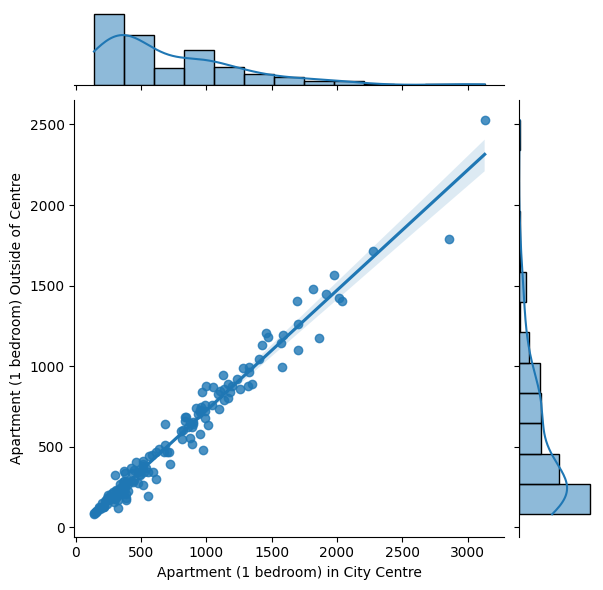

In [72]:
# Plot correlations
sns.jointplot(data=df_apt, x=apt_attr[0], y=apt_attr[1], kind="reg")

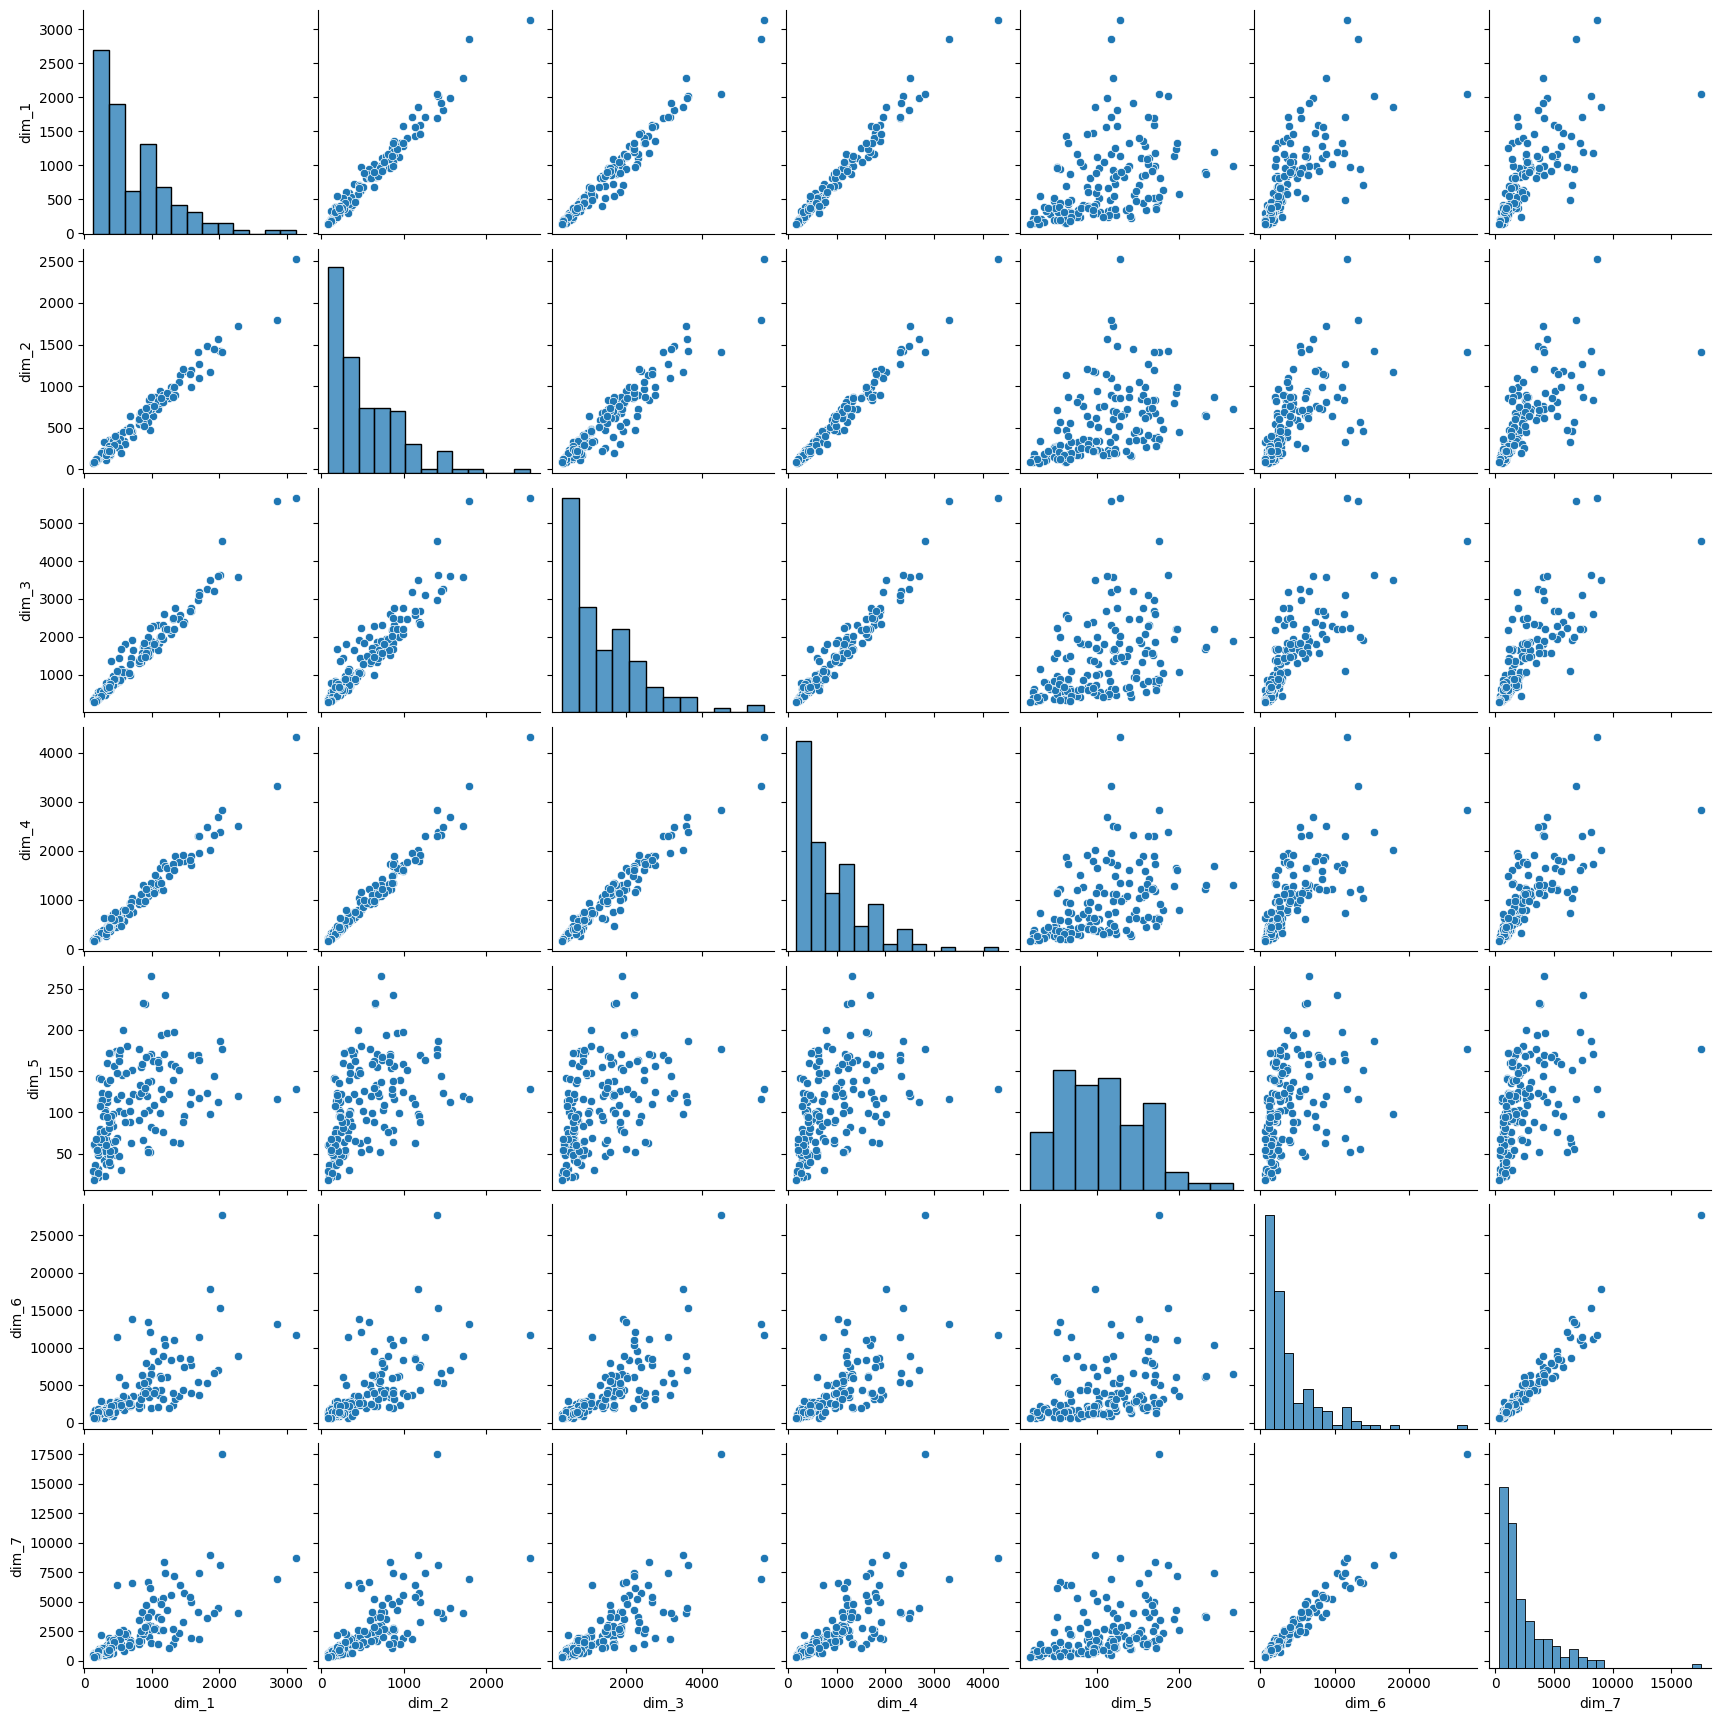

In [73]:
# Compare all vars
apt_attr_dims = [f"dim_{i}" for i in range(1, len(apt_attr)+1)]

g = sns.pairplot(data=df_apt.set_axis(apt_attr_dims, axis=1))

# for i, ax in enumerate(g.axes.flat):
#     ax.set_ylabel(f"feat_{int(i/apt_attr_num+1)}")
#     ax.set_xlabel(i)
# plt.show()


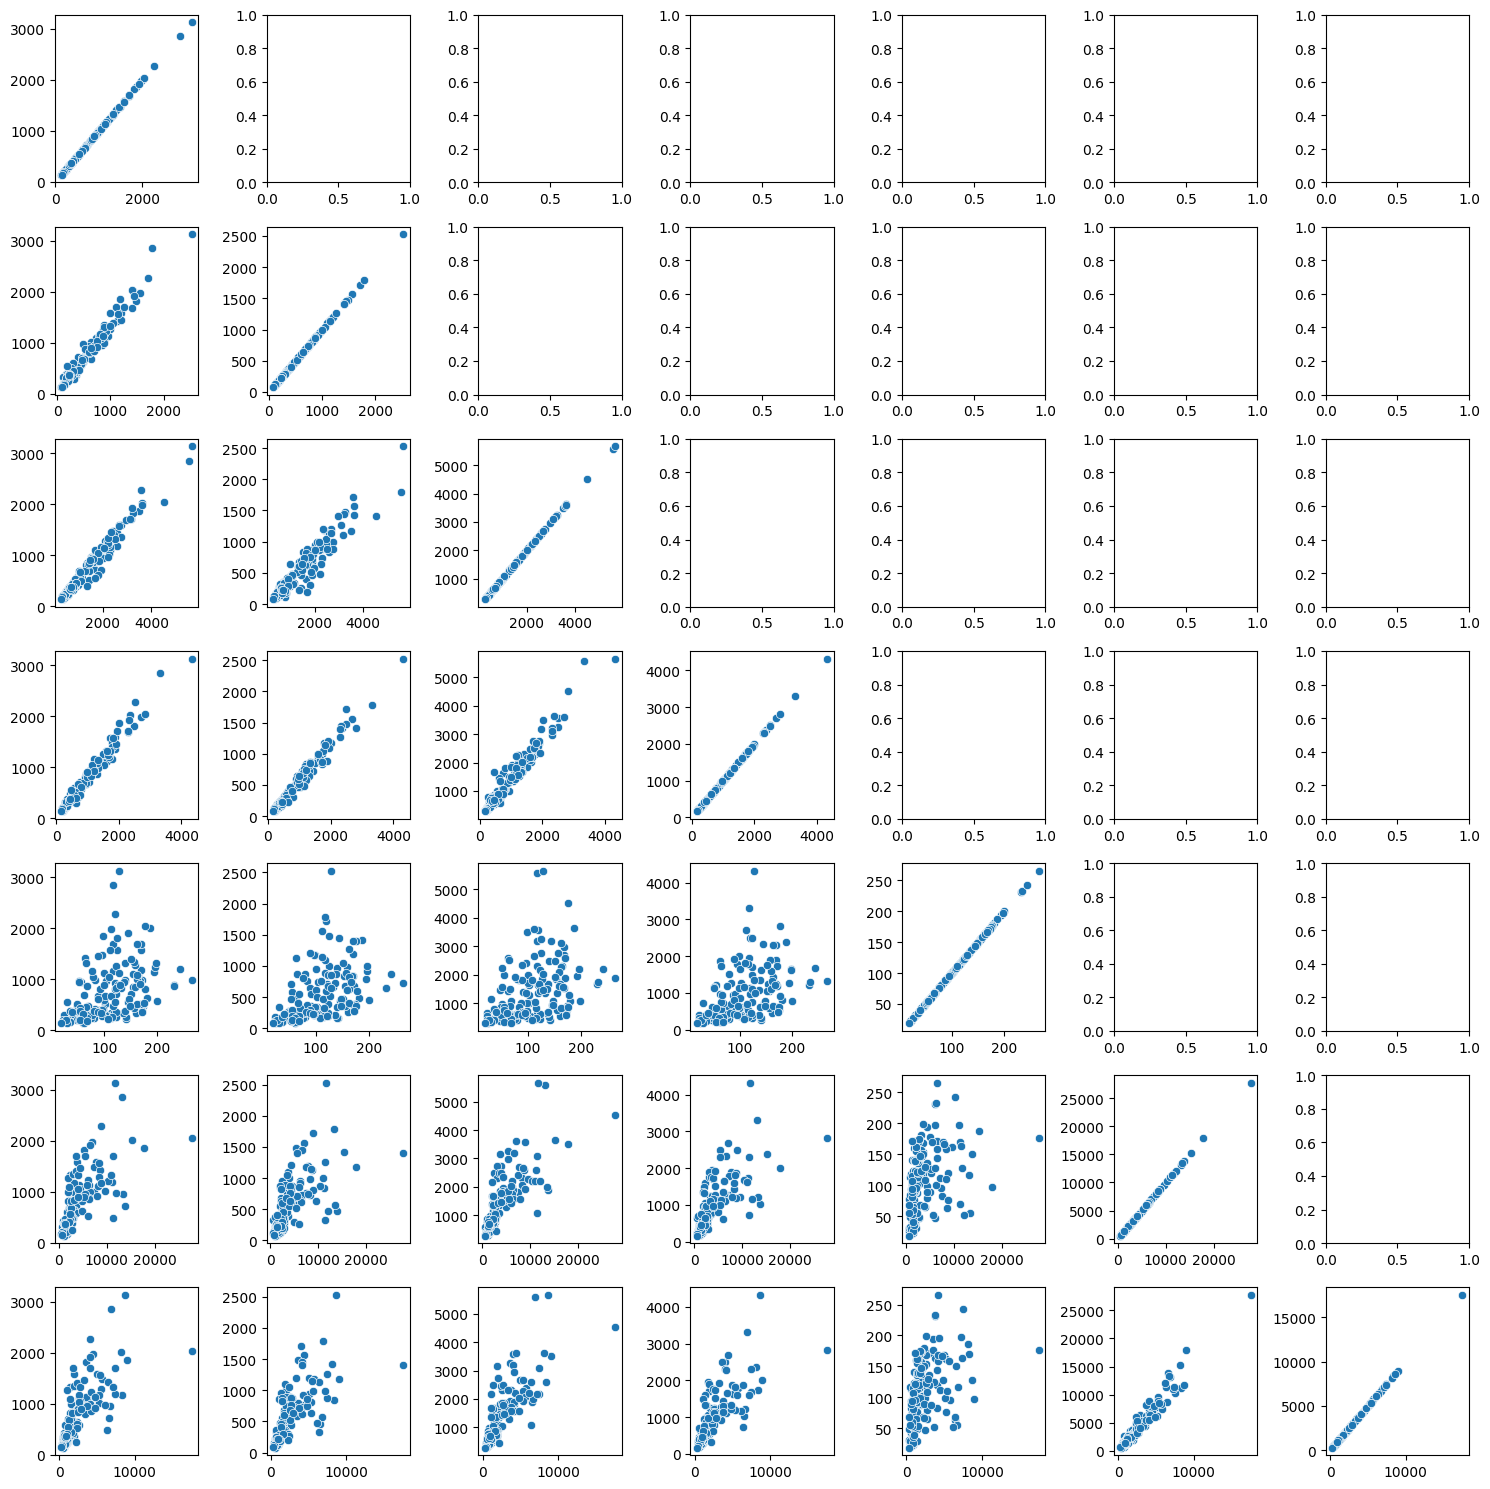

In [74]:
fig, axes = plt.subplots(7, 7,figsize=(15,15))
k = 0
for i in range(len(apt_attr)):
    for j in range(len(apt_attr)):
        if(i >= j):
            sns.scatterplot(x=apt_attr[i], y=apt_attr[j], data=df_apt, ax=axes[int(k/7),k%7])
            axes[int(k/7),k%7].set_title('')
            axes[int(k/7),k%7].set_xlabel("")
            axes[int(k/7),k%7].set_ylabel("")
        k += 1
fig.tight_layout()

In [75]:
df_apt.corr()

,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,"Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment",Price per Square Meter to Buy Apartment in City Centre,Price per Square Meter to Buy Apartment Outside of Centre
Apartment (1 bedroom) in City Centre,1.000000,0.985038,0.981850,0.986494,0.433947,0.720902,0.742220
Apartment (1 bedroom) Outside of Centre,0.985038,1.000000,0.948160,0.987023,0.456523,0.673747,0.719674
Apartment (3 bedrooms) in City Centre,0.981850,0.948160,1.000000,0.975950,0.407968,0.774545,0.780206
Apartment (3 bedrooms) Outside of Centre,0.986494,0.987023,0.975950,1.000000,0.444807,0.721992,0.759848
"Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment",0.433947,0.456523,0.407968,0.444807,1.000000,0.373824,0.428310
Price per Square Meter to Buy Apartment in City Centre,0.720902,0.673747,0.774545,0.721992,0.373824,1.000000,0.974075
Price per Square Meter to Buy Apartment Outside of Centre,0.742220,0.719674,0.780206,0.759848,0.428310,0.974075,1.000000


- Rentals features (dim1 to 4) all correlated strongly (>0.94)
- Price features (dim 6-7) are correlated (0.97)
- Basic service independent from "Rentals" and "Price" types features

Question 2 : Quelles sont les villes ayant des coûts de vie similaires ?

In [76]:
# Check if all data types are numerical
print(f"Data types : {np.unique(df_cl.dtypes.to_list())}")

# Check for NaN
print(f"Number of rows with any NaN : {len(df_cl.isna().any()[df_cl.isna().any()])}")

# Check for neg data
print(f"Number of cols with negative values : {len((df_cl < 0).any()[(df_cl < 0).any()].index)}")



Data types : [dtype('float64')]
Number of rows with any NaN : 0
Number of cols with negative values : 0


Individual graphs

In [77]:
# for i, att in enumerate(attr):
#     plt.figure(i, figsize=(5,5))
#     sns.histplot(df_cl[att])

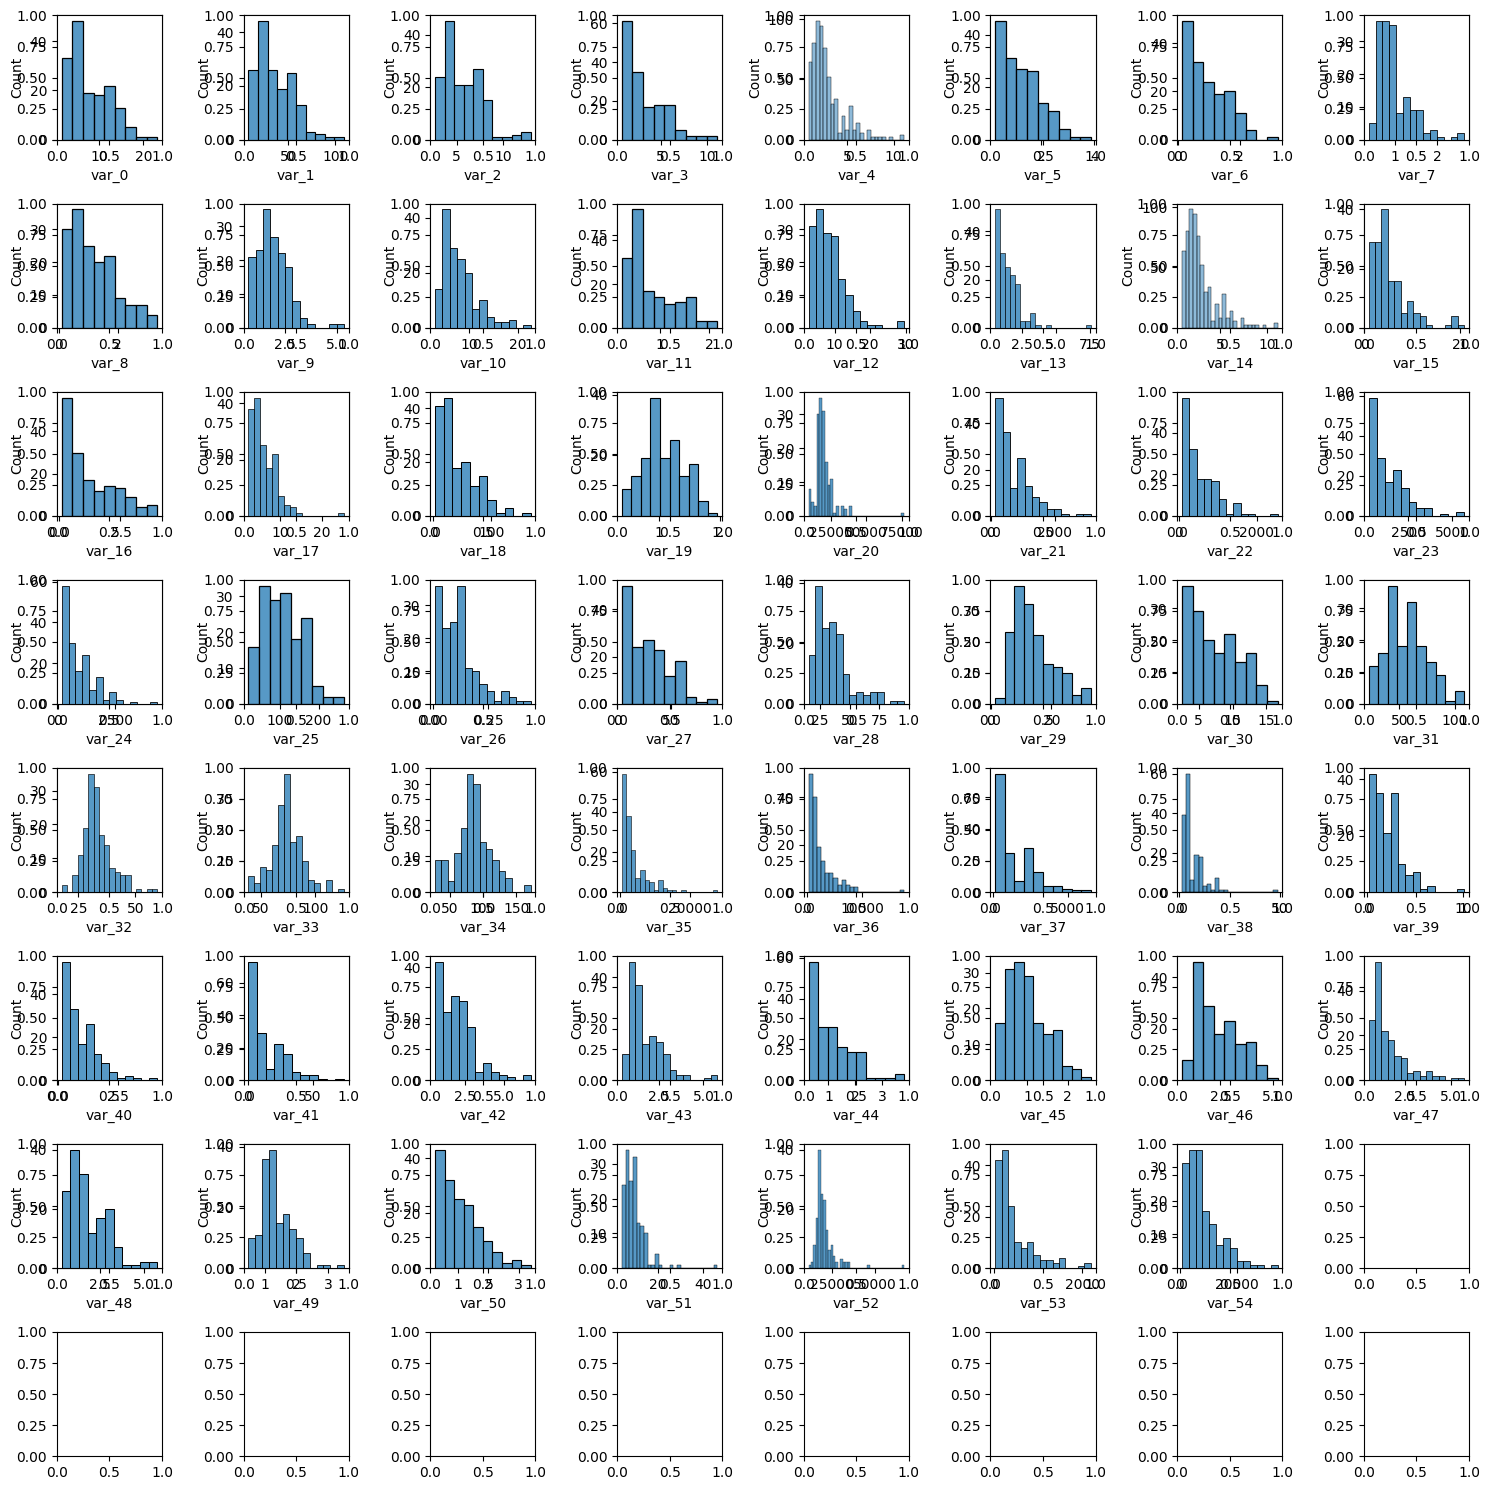

In [78]:
grid_len = int(np.ceil((np.sqrt(len(df_cl.columns)))))

fig, ax = plt.subplots(grid_len, grid_len, figsize=(15,15))

for i, att in enumerate(attr):
    ax=fig.add_subplot(grid_len, grid_len, i+1)
    sns.histplot(df_cl[att], legend=False)
    ax.set_xlabel(f"var_{i}")

fig.tight_layout()

In [79]:
attr[0:5]

['Meal, Inexpensive Restaurant',
 'Meal for 2 People, Mid-range Restaurant, Three-course',
 'McMeal at McDonalds (or Equivalent Combo Meal)',
 'Domestic Beer (0.5 liter draught)',
 'Imported Beer (0.33 liter bottle)']

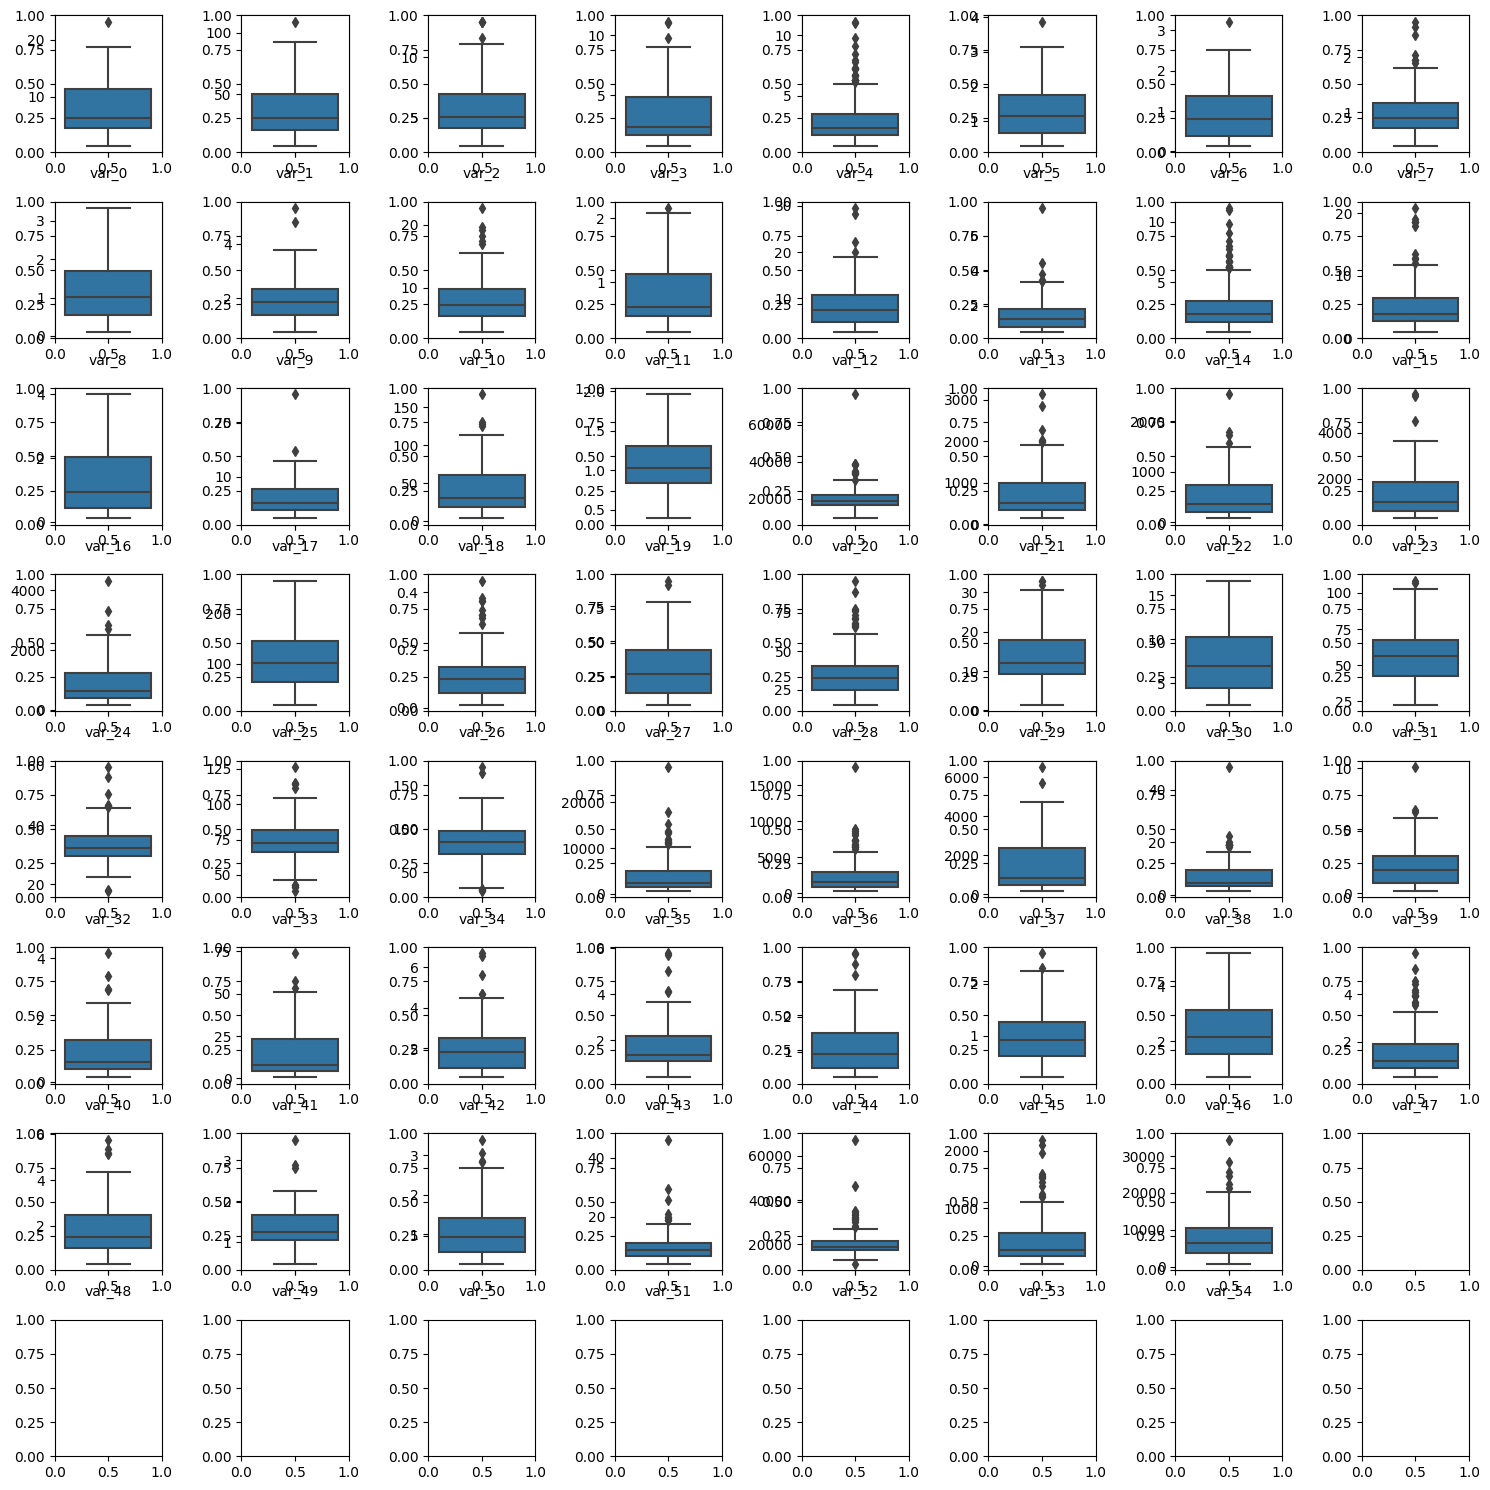

In [80]:
fig, ax = plt.subplots(grid_len, grid_len, figsize=(15,15))

for i, att in enumerate(attr):
    ax = fig.add_subplot(grid_len, grid_len, i+1)
    sns.boxplot(y=df_cl[att].values)
    ax.set_xlabel(f"var_{i}")

fig.tight_layout()

Lots of outliers, remove them or normalize before running clustering algo. Let's just try some simple MinMax scaler to normalize the data

In [113]:
def custom_minmax(df):
    df_std = df
    for i in df.columns:
        new_att = (df_cl[i] - np.min(df_cl[i])) / (np.max(df_cl[i]) - np.min(df_cl[i]))
        df_std[i] = new_att
    return df_std

In [114]:
df_cl_std = custom_minmax(df_cl)
df_cl_std.head()

,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),...,Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child",clusters
cities,,,,,,,,,,,,,,,,,,,,,
"Saint Petersburg, Russia",0.270458,0.214236,0.167961,0.137198,0.100705,0.131285,0.127036,0.262222,0.188854,0.093886,...,0.284141,0.077220,0.288355,0.135762,0.073016,0.072246,0.144916,0.173699,0.136710,0.0
"Istanbul, Turkey",0.142857,0.075711,0.111650,0.220290,0.187311,0.097765,0.032573,0.142222,0.080495,0.189956,...,0.257709,0.150579,0.083179,0.473510,0.117460,0.133047,0.172851,0.113961,0.181774,0.0
"Izmir, Turkey",0.072584,0.045584,0.037864,0.145894,0.156093,0.089385,0.026059,0.115556,0.086687,0.165939,...,0.196035,0.152510,0.064695,0.430464,0.104762,0.106342,0.173280,0.081165,0.123623,0.0
"Helsinki, Finland",0.485899,0.565226,0.517476,0.552657,0.558912,0.662011,0.570033,0.253333,0.671827,0.277293,...,0.704846,0.310811,0.473198,0.374172,0.317460,0.195279,0.235649,0.145784,0.025346,1.0
"Chisinau, Moldova",0.147018,0.129467,0.143689,0.025121,0.023162,0.097765,0.097720,0.128889,0.071207,0.078603,...,0.127753,0.079151,0.223660,0.294702,0.107937,0.029089,0.108122,0.080396,0.056198,0.0


**K-Means clustering**

In [115]:
from sklearn.cluster import KMeans

X = df_cl
X_std = df_cl_std

In [116]:
def elbow_method(X, min_clusters, max_clusters):
    # Kmeans for each min/max clusters
    distortions = []
    for i in range(min_clusters, max_clusters):
        km = KMeans(n_clusters=i).fit(X)
        distortions.append(km.inertia_)
    # Plot distortions
    fig = plt.figure()
    
    plt.plot(range(min_clusters,len(distortions)+min_clusters), distortions, marker="o")
    plt.title(f"K-means distortions over k = {min_clusters} to {max_clusters} clusters")
    plt.xlabel("Number of clusters")
    plt.xticks(range(min_clusters-1, max_clusters+1))
    plt.ylabel("Distortion")
    plt.show()
    
    return distortions
        

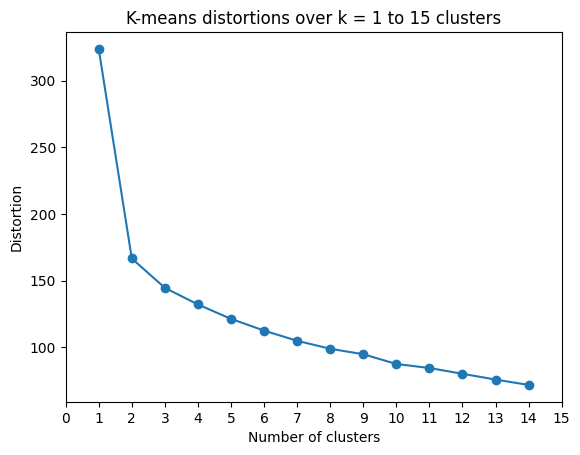

In [117]:
distos = elbow_method(X, 1, 15)

Try minmax normalization on data

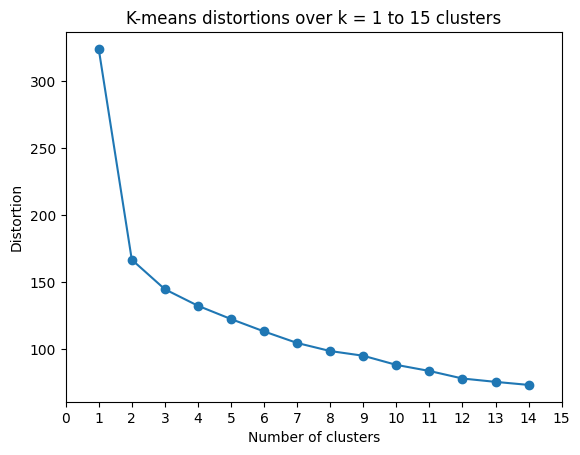

In [118]:
distos_std = elbow_method(X_std, 1, 15)

In [119]:
distos_std == distos

False

Let's check both elbow plots on same graph

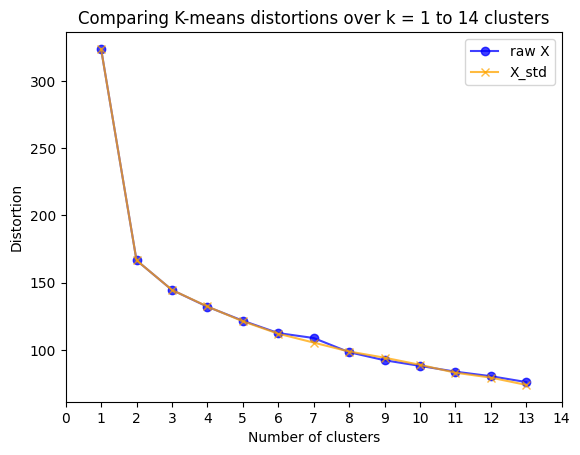

In [120]:
distortions = []
distos_std = []
min_clusters = 1
max_clusters = 14

for i in range(min_clusters, max_clusters):
    km = KMeans(n_clusters=i).fit(X)
    km_std = KMeans(n_clusters=i).fit(X_std)
    distortions.append(km.inertia_)
    distos_std.append(km_std.inertia_)
# Plot distortions
fig = plt.figure()

plt.plot(range(min_clusters,len(distortions)+min_clusters), distortions, marker="o", c="blue", alpha=0.75)
plt.plot(range(min_clusters,len(distos_std)+min_clusters), distos_std, marker="x", c="orange", alpha=0.75)
plt.title(f"Comparing K-means distortions over k = {min_clusters} to {max_clusters} clusters")
plt.xlabel("Number of clusters")
plt.xticks(range(min_clusters-1, max_clusters+1))
plt.ylabel("Distortion")
plt.legend(["raw X", "X_std"])
plt.show()

**MinMax norm did not improve the clustering that much because many data pre-processing steps have been ommitted such as : outlier removal, correlated features, norm/std according to distribution of feature etc.**

The exercise here is to familiarize ourselves with the tools.

**Let's try the silouhette plot to help us choose our K**

In [121]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.decomposition import PCA
import matplotlib.colors as mcolors

tab:blue
tab:orange
tab:green
tab:red
tab:purple
tab:brown
tab:pink
tab:gray
tab:olive
tab:cyan


{0: 0.9686274509803922, 1: 0.7137254901960784, 2: 0.8235294117647058, 3: 1.0}

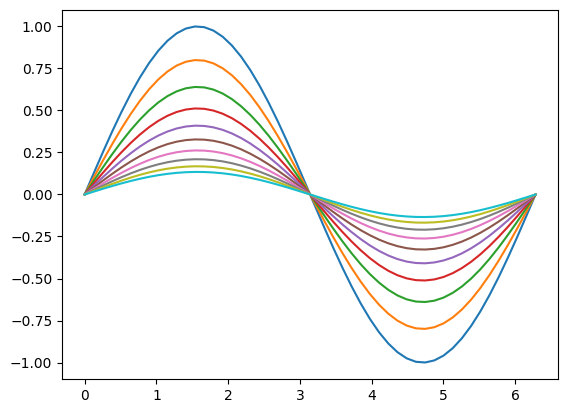

In [122]:
x = np.linspace(0, 2*np.pi)
y = np.sin(x)
A = 1
for color in mcolors.TABLEAU_COLORS:
    plt.plot(x, A * y, c=color, label=color)
    A *=0.8
    print(color)
# t = {i:color for i, color in enumerate(mcolors.tab20)}
{i: color for i, color in enumerate(plt.cm.tab20(i))}


In [123]:
# Inspired by sklearn docs
def silouhette_plot(X, min_clusters, max_clusters):
    range_n_clusters = list(range(min_clusters, max_clusters+1))
    # label_colors = [plt.cm.tab20(i) for i in range_n_clusters]
    
    for n_clusters in range_n_clusters:
        # Set fig params
        fig, (ax1, ax2) = plt.subplots(1,2)
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
        
        # KMeans + silouhette avg
        km = KMeans(n_clusters=n_clusters).fit(X)
        silhouette_avg = silhouette_score(X, km.labels_)
        print(f"For k = {n_clusters}, silouhette avg = {silhouette_avg}")
        
        # Silouhette scores for each samples
        sample_silouhette_vals = silhouette_samples(X, km.labels_)
        y_lower = 10
        
        for i in range(n_clusters):
            # Sort sil scores per sample
            ith_cluster_silhouette_values = sample_silouhette_vals[km.labels_ == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            label_color = plt.cm.tab20(i / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=label_color,
                edgecolor=label_color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("Silhouette plot for clusters")
        ax1.set_xlabel("Silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="black", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # Plot PCA
        pca = PCA(n_components=2).fit(X)
        data2d = pca.transform(X)
        cluster_colors = plt.cm.tab20(km.labels_.astype(float) / n_clusters)
        ax2.scatter(
            data2d[:,0], data2d[:,1], marker=".", s=50, lw=0, c=cluster_colors, alpha=0.7, edgecolor="k"
        )
        
        # Labeling the clusters
        centers2d = pca.transform(km.cluster_centers_)
        centers_colors = plt.cm.tab20(np.unique(km.labels_.astype(float) / n_clusters))
        ax2.scatter(centers2d[:, 0], centers2d[:, 1], marker="x", c=centers_colors, s=100)

        ax2.set_title("PCA colored by cluster and centers")
        ax2.set_xlabel("PC1")
        ax2.set_ylabel("PC2")

        plt.suptitle(
            f"Silhouette analysis for KMeans clustering on sample data with n_clusters = {n_clusters}",
            fontsize=14,
            fontweight="bold",
        )
        fig.tight_layout()

    plt.show()
    

In [124]:
km = KMeans(n_clusters= 4).fit(X_std)
pca = PCA(n_components=10).fit(X_std)
data10d = pca.transform(X_std)
data10d[:,1].shape


(160,)

For k = 2, silouhette avg = 0.44296303322121294
For k = 3, silouhette avg = 0.4091634109942717
For k = 4, silouhette avg = 0.18858826843579593
For k = 5, silouhette avg = 0.18829079723378733
For k = 6, silouhette avg = 0.20627074240629772
For k = 7, silouhette avg = 0.20128138642402785
For k = 8, silouhette avg = 0.20059589902191838


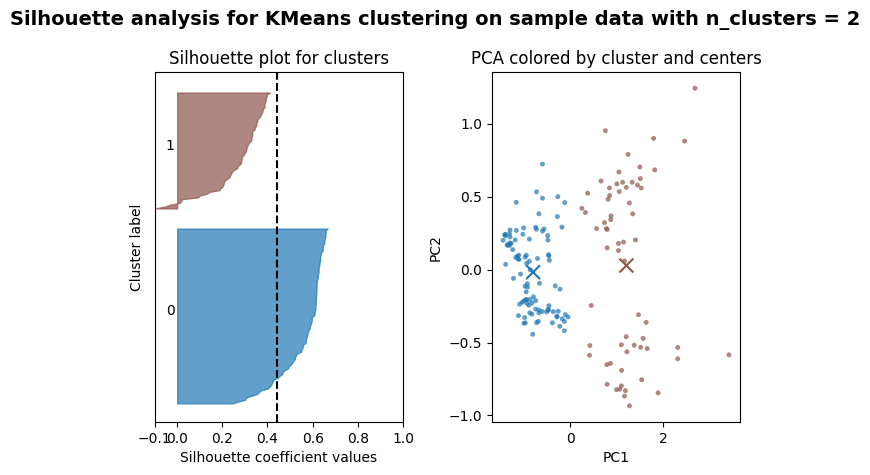

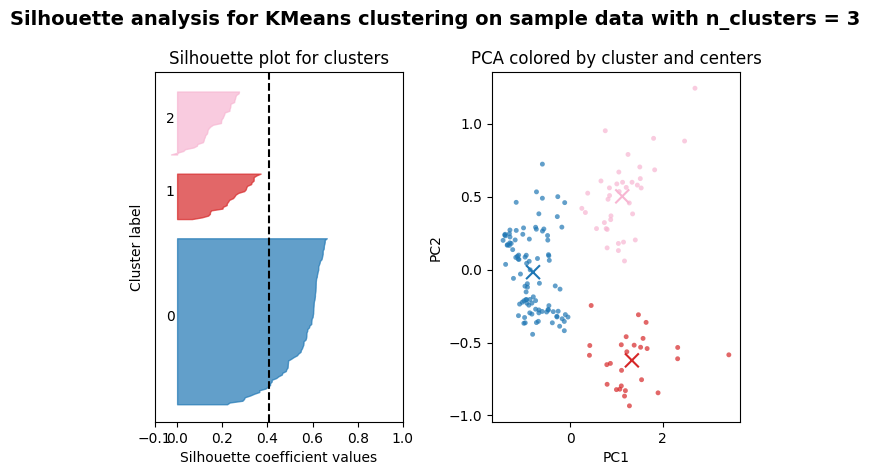

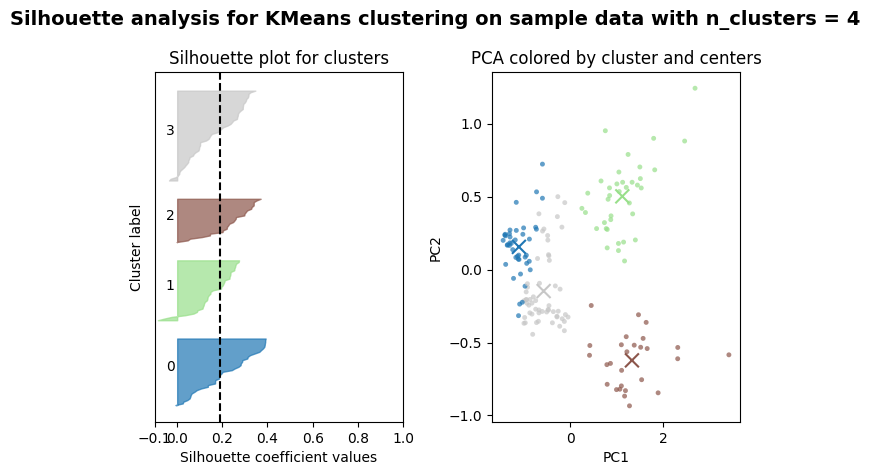

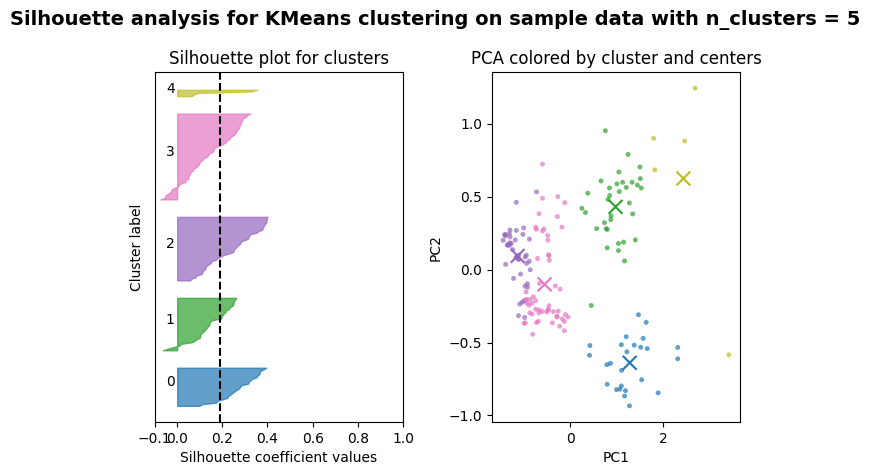

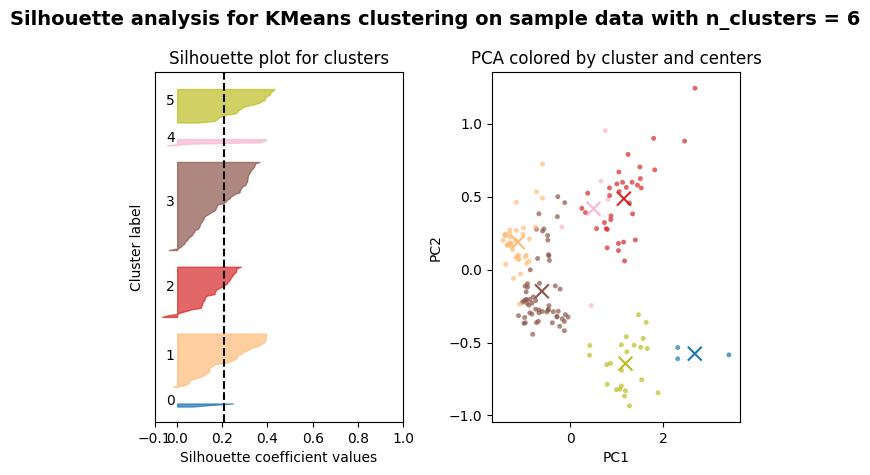

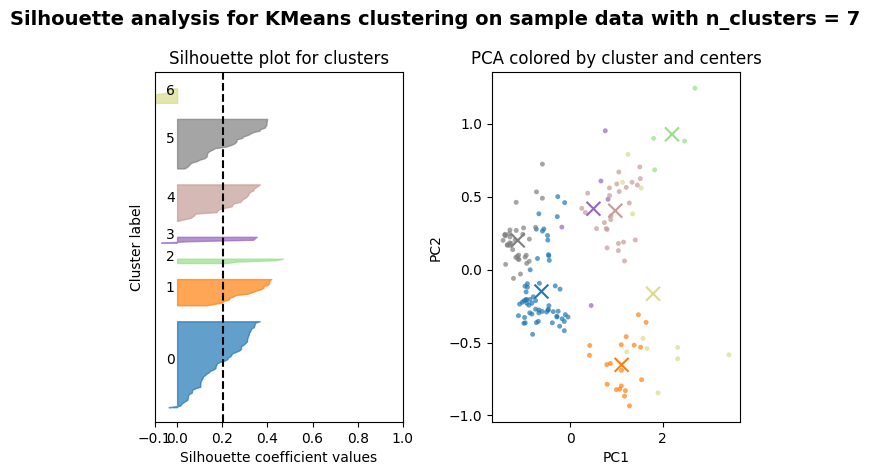

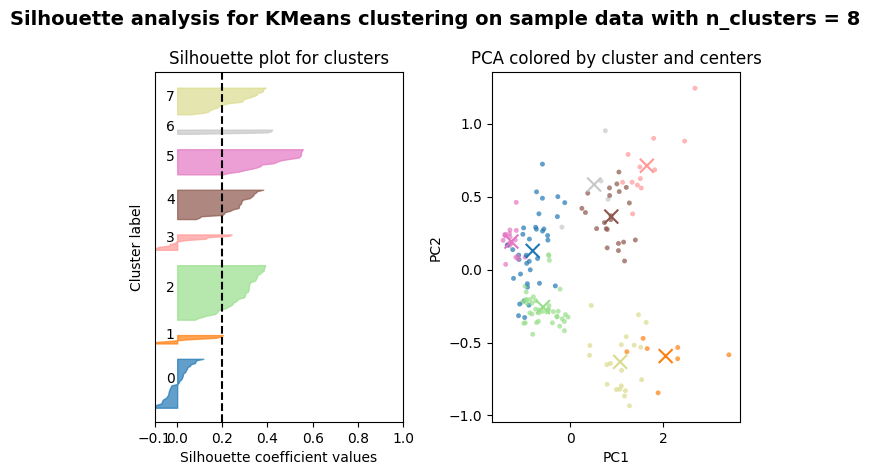

In [125]:
silouhette_plot(X_std, 2, 8)

Let's pick 3 clusters for best separation on the PCA plot and low negative values + highest silhouette score avg

In [126]:
km = KMeans(n_clusters= 3).fit(X_std)
X_std["clusters"] = km.labels_
X_std.iloc[:, -1:]

,clusters
cities,
"Saint Petersburg, Russia",1
"Istanbul, Turkey",1
"Izmir, Turkey",1
"Helsinki, Finland",2
"Chisinau, Moldova",1
...,...
"Melbourne, Australia",0
"Perth, Australia",0
"Sydney, Australia",0


In [127]:
clusters = {}
for i in range(len(set(km.labels_))):
    clusters[f"cluster{i}"] = (X_std["clusters"][X_std["clusters"] == i]).index.to_list()
print(clusters)

{'cluster0': ['Calgary, Canada', 'Edmonton, Canada', 'Ottawa, Canada', 'Austin, TX, United States', 'Singapore, Singapore', 'Toronto, Canada', 'Auckland, New Zealand', 'Vancouver, Canada', 'Tokyo, Japan', 'Victoria, Canada', 'Winnipeg, Canada', 'Boston, MA, United States', 'Chicago, IL, United States', 'Dallas, TX, United States', 'Abu Dhabi, United Arab Emirates', 'Houston, TX, United States', 'Dubai, United Arab Emirates', 'Las Vegas, NV, United States', 'Los Angeles, CA, United States', 'Panama City, Panama', 'Seoul, South Korea', 'New York, NY, United States', 'Phoenix, AZ, United States', 'Hong Kong, Hong Kong', 'Portland, OR, United States', 'San Diego, CA, United States', 'San Francisco, CA, United States', 'Seattle, WA, United States', 'Doha, Qatar', 'Taipei, Taiwan', 'San Jose, Costa Rica', 'Montreal, Canada', 'Adelaide, Australia', 'Brisbane, Australia', 'Melbourne, Australia', 'Perth, Australia', 'Sydney, Australia'], 'cluster1': ['Saint Petersburg, Russia', 'Istanbul, Turke

In [128]:
# Remove Kmeans clusters
X_std = X_std.drop(columns=["clusters"])
X_std.iloc[:,-1:].head()

,"International Primary School, Yearly for 1 Child"
cities,
"Saint Petersburg, Russia",0.136710
"Istanbul, Turkey",0.181774
"Izmir, Turkey",0.123623
"Helsinki, Finland",0.025346
"Chisinau, Moldova",0.056198


Question 3 : Peut-on fiablement déduire le continent d'une ville à partir du coût de la vie dans cette ville ?

In [129]:
# Get continent labels
import pycountry_convert as pc
country_list = X_std.index 
y = []
for country in country_list:
    country_name = country.split(", ")[-1]
    try:
        continent_code = pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country_name))
    except:
        if(country_name == "Bosnia And Herzegovina"):
            continent_code = 'EU'
        else:
            continent_code = "NaN"
    y.append(continent_code)
print(y)

['EU', 'AS', 'AS', 'EU', 'EU', 'EU', 'AF', 'EU', 'AS', 'NA', 'AS', 'AS', 'AS', 'NA', 'EU', 'NA', 'EU', 'EU', 'EU', 'EU', 'NA', 'AF', 'NA', 'EU', 'EU', 'EU', 'EU', 'EU', 'EU', 'EU', 'NA', 'EU', 'EU', 'EU', 'EU', 'EU', 'EU', 'AS', 'NA', 'AS', 'NA', 'OC', 'EU', 'NA', 'AS', 'NA', 'NA', 'NA', 'NA', 'AS', 'EU', 'EU', 'EU', 'NA', 'EU', 'EU', 'EU', 'EU', 'EU', 'SA', 'AF', 'AS', 'NA', 'AS', 'AS', 'SA', 'EU', 'EU', 'EU', 'NA', 'EU', 'NA', 'NA', 'AS', 'EU', 'EU', 'EU', 'AS', 'NA', 'EU', 'EU', 'AS', 'AS', 'AS', 'EU', 'EU', 'NA', 'AS', 'NA', 'EU', 'AS', 'AF', 'EU', 'EU', 'AF', 'EU', 'EU', 'AF', 'EU', 'NA', 'NA', 'SA', 'NA', 'EU', 'EU', 'AS', 'AS', 'EU', 'EU', 'EU', 'AS', 'EU', 'AS', 'AS', 'AS', 'AS', 'EU', 'EU', 'AS', 'SA', 'AS', 'EU', 'AS', 'AS', 'EU', 'AS', 'AS', 'AS', 'EU', 'AS', 'AS', 'EU', 'SA', 'EU', 'NA', 'AF', 'EU', 'NA', 'SA', 'EU', 'EU', 'EU', 'NA', 'OC', 'EU', 'AS', 'AS', 'OC', 'AS', 'AS', 'EU', 'EU', 'AS', 'EU', 'AS', 'OC', 'OC', 'OC', 'AF', 'SA']


In [139]:
# Append class to df
X_std["continent"] = y
X_std.iloc[:, -1:].head()

,continent
cities,
"Saint Petersburg, Russia",EU
"Istanbul, Turkey",AS
"Izmir, Turkey",AS
"Helsinki, Finland",EU
"Chisinau, Moldova",EU


Use of random forest classifier to predict continent of city based on cost of living attributes

In [141]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X_std.drop(columns=["continent"]) ,X_std['continent'],random_state=0)

In [195]:
# With 75/25 train/test split, run RFC with default params
from sklearn.ensemble import RandomForestClassifier
clf_md3 = RandomForestClassifier(max_depth=3)

#Train the model
clf_md3.fit(X_train, y_train)

y_pred3 = clf_md3.predict(X_test)

In [196]:
clf_md5 = RandomForestClassifier(max_depth=5)

#Train the model
clf_md5.fit(X_train, y_train)

y_pred5 = clf_md5.predict(X_test)

In [197]:
from sklearn import metrics
print(f"Accuracy with md3 : {metrics.accuracy_score(y_test, y_pred3)}")
print(f"Accuracy with md3 : {metrics.accuracy_score(y_test, y_pred5)}")

Accuracy with md3 : 0.7
Accuracy with md3 : 0.8


Pretty bad accuracy. There is so much we could do to improve the model, especially in the data pre-processing + parameter optimization